In [74]:
import os, sys
PROJECT_ROOT = os.path.abspath(os.path.dirname(sys.path[0]))
sys.path.append(PROJECT_ROOT)

import torch
from lsr_tensor import *
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

In [114]:
def visualize_lsr(lsr_tensor):
    expanded = lsr_tensor.expand_to_tensor().detach()

    fig, axs = plt.subplots(1, lsr_tensor.separation_rank)
    fig.tight_layout(pad=3.0)
    
    # Create a colormap ranging from red (negative values) to blue (positive values)
    cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', ['blue', 'white', 'red'])
    
    for i, ax in enumerate(axs):
        normalized_tucker = (lsr_tensor.expand_tucker_term(i) - expanded.min()) / (expanded.max() - expanded.min())
        plt.colorbar(cm.ScalarMappable(norm=mcolors.Normalize(expanded.min(), expanded.max()), cmap=cmap), ax=ax, fraction=0.046, pad=0.04)
        ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
        ax.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
        c = ax.imshow(normalized_tucker.detach(), cmap=cmap)
        

In [116]:
breast_lsr_dot = torch.load(f"{path_base}/centralized/weights/lsr_dot_0.pt")

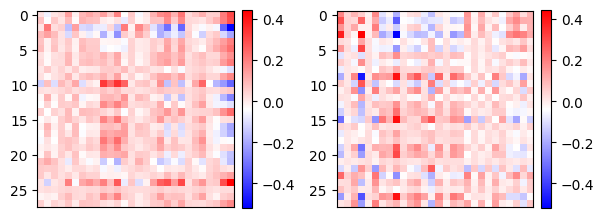

In [117]:
visualize_lsr(breast_lsr_dot)